In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas_visual_analysis import VisualAnalysis
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
from datetime import date
import time

In [2]:
data = pd.read_csv('./csv/abusingDetectionTrainDataset.csv')
data.shape

(104399, 44)

In [3]:
data.columns

Index(['newID', 'char_jobcode', 'char_level', 'logging_timestamp', 'charStatA',
       'charStatB', 'charStatC', 'charStatD', 'charStatE', 'charStatF',
       'charStatG', 'socialAmountA', 'socialBooleanA', 'socialBooleanB',
       'socialSessionAmountA', 'activityCumulativeAmountA',
       'accountMetaAmountA', 'charSessionAmountA', 'charSessionAmountB',
       'charMoveSessionAmountA', 'charSessionAmountC', 'socialSessionAmountB',
       'actionSessionAmountA', 'charSessionAmountD',
       'activityCumulativeAmountB', 'actionSessionAmountB',
       'actionSessionAmountC', 'actionSessionAmountD', 'actionSessionAmountE',
       'tradeSessionAmountA', 'tradeSessionAmountB', 'tradeSessionAmountC',
       'actionSessionAmountF', 'actionSessionAmountG', 'actionSessionAmountH',
       'actionSessionAmountI', 'actionSessionAmountJ', 'actionSessionAmountK',
       'actionSessionAmountL', 'actionSessionAmountM', 'actionSessionAmountN',
       'tradeSessionAmountD', 'tradeSessionAmountE', 'bloc

# 데이터 제재 / 비제재

In [4]:
is_blocked = data['blocked'] == 1
is_unblocked = data['blocked'] == 0

data_blocked = data[is_blocked]
data_unblocked = data[is_unblocked]

# 케릭터 직업 (char_jobcode)

In [5]:
#-- 직업 분포 --
data_blocked_jobcode = list(data_blocked['char_jobcode'])

set_blocked_jobcode = list(set(data_blocked_jobcode))  # 중복 제거
list_blocked_jobcode = np.array([0 for i in range(max(set_blocked_jobcode)+1)])  # 리스트 생성 & 초기화

for idx, _item in enumerate(data_blocked_jobcode):
    list_blocked_jobcode[_item] += 1

print("------ blocked ------")
print(np.argsort(-list_blocked_jobcode))
print(np.sort(list_blocked_jobcode)[::-1])

------ blocked ------
[30 31 29 21 32 28 27 26 25 24 23 22 20 19 18 17  0 14 13 12 11 10  9  8
  7  6  5  4  3  2  1 15 16]
[31736 14616 13078  2064   966     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0]


In [6]:
#-- 직업 분포 --

data_unblocked_jobcode = list(data_unblocked['char_jobcode'])

set_unblocked_jobcode = list(set(data_unblocked_jobcode))  # 중복 제거
list_unblocked_jobcode = np.array([0 for i in range(max(set_unblocked_jobcode)+1)])  # 리스트 생성 & 초기화

for idx, _item in enumerate(data_unblocked_jobcode):
    list_unblocked_jobcode[_item] += 1

print("------ unblocked ------")
print(np.argsort(-list_unblocked_jobcode))
print(np.sort(list_unblocked_jobcode)[::-1])

------ unblocked ------
[ 30  29  31   0   8  21  46  19  17  12  64  73  60  16 124  75  47  20
  61  57  45  26  56   3  25  49  72  59  18 112   2  44  89  37  15  40
  74 110  66  55  33  54  86  51  62  68 102  39 120  13   9  85  23  96
  78 116   1  53  34 119  82  65  22  11  32 101  48  77  36 118   6  87
   5  71  41 125  98  92  69 111  28  50  27  99  63 113 106  95 117 115
  84  58 128  70  43  35 122 103  38 138  76 134 130  42   4  10 135  79
  81  90 109 107 145  67  24 121  93  88 132  52  83 146 105 143  97   7
 127 140  14 108 133 123  91 154 136 139 144 153 126 100  80 142 161 131
 155 137 158 149 114  94 147 151 159 104 129 165 150 148 160 162 163 157
 152 156 141 164]
[9063 4251 3693 1096  895  893  734  646  615  538  487  464  438  413
  405  380  374  364  351  351  337  332  330  328  308  291  272  272
  268  256  246  244  243  242  239  237  234  232  228  222  218  216
  214  209  203  203  199  191  184  177  176  173  166  166  162  158
  158  157  155  


# 각 직업에 따른 레벨 분포

In [7]:
# 각각의 직업을 갖고 있는 유저들의 최소 레벨과 최대 레벨

In [8]:
# 제재
data_job_blocked = np.array(data_blocked['char_jobcode'])
data_level_blocked = np.array(data_blocked['char_level'])

length_job_blocked = data_job_blocked.max()

list_blocked_job_level = np.array([[999, 0] for i in range(length_job_blocked+1)])  # 리스트 생성 & 초기화

for _job, _level in zip(data_job_blocked, data_level_blocked):
    list_blocked_job_level[_job][0] = min(list_blocked_job_level[_job][0], _level)
    list_blocked_job_level[_job][1] = max(list_blocked_job_level[_job][1], _level)

for _line in list_blocked_job_level:
    if _line[0] == 999:
        _line[0] = 0

print('char_jobcode, level_min, level_max')
for idx, _line in enumerate(list_blocked_job_level):
    print(idx, _line[0], _line[1])  

char_jobcode, level_min, level_max
0 0 0
1 0 0
2 0 0
3 0 0
4 0 0
5 0 0
6 0 0
7 0 0
8 0 0
9 0 0
10 0 0
11 0 0
12 0 0
13 0 0
14 0 0
15 0 0
16 0 0
17 0 0
18 0 0
19 0 0
20 0 0
21 10 34
22 0 0
23 0 0
24 0 0
25 0 0
26 0 0
27 0 0
28 0 0
29 10 61
30 30 98
31 60 112
32 100 133


In [9]:
# 비제재
data_job_unblocked = np.array(data_unblocked['char_jobcode'])
data_level_unblocked = np.array(data_unblocked['char_level'])

length_jobcode_unblocked = data_job_unblocked.max()

list_unblocked_job_level = np.array([[999, 0] for i in range(length_jobcode_unblocked+1)])  # 리스트 생성 & 초기화

for _job, _level in zip(data_job_unblocked, data_level_unblocked):
    list_unblocked_job_level[_job][0] = min(list_unblocked_job_level[_job][0], _level)
    list_unblocked_job_level[_job][1] = max(list_unblocked_job_level[_job][1], _level)

for _line in list_unblocked_job_level:
    if _line[0] == 999:
        _line[0] = 0
        
for idx, _line in enumerate(list_unblocked_job_level):
    print(idx, _line[0], _line[1])  #char_jobcode, level_min, level_max

0 10 135
1 10 53
2 11 73
3 30 72
4 10 43
5 12 46
6 30 94
7 60 97
8 10 76
9 30 73
10 46 88
11 10 58
12 10 60
13 60 131
14 100 134
15 10 70
16 10 109
17 30 100
18 60 121
19 10 64
20 30 82
21 10 100
22 10 49
23 31 76
24 61 118
25 10 67
26 30 100
27 60 115
28 10 53
29 10 64
30 30 86
31 60 130
32 100 146
33 10 76
34 31 82
35 61 118
36 10 64
37 30 70
38 60 112
39 10 52
40 30 91
41 30 76
42 61 131
43 10 52
44 10 61
45 31 70
46 10 101
47 30 88
48 10 52
49 31 70
50 10 88
51 30 76
52 61 106
53 11 55
54 10 58
55 30 73
56 10 79
57 30 79
58 61 109
59 10 100
60 10 103
61 30 100
62 10 64
63 30 73
64 10 100
65 10 58
66 30 73
67 60 103
68 30 70
69 60 115
70 10 61
71 30 73
72 10 96
73 30 97
74 10 53
75 30 100
76 21 49
77 10 64
78 30 100
79 61 100
80 100 124
81 10 43
82 10 61
83 10 37
84 30 82
85 10 49
86 31 100
87 60 124
88 100 136
89 30 79
90 61 130
91 100 138
92 10 76
93 64 109
94 100 118
95 10 46
96 30 73
97 61 103
98 30 94
99 60 112
100 100 130
101 10 46
102 30 88
103 60 106
104 103 131
105 60 100
1

# 레벨 히스토그램

In [10]:
# 제재

length_hist = max(data_level_blocked.max(), data_level_unblocked.max()) + 1

# 리스트 생성 & 초기화
hist_level_blocked = np.array([0 for i in range(length_hist)])
hist_level_unblocked = np.array([0 for i in range(length_hist)])

for idx, _item in enumerate(data_level_blocked):
    hist_level_blocked[_item] += 1
print(hist_level_blocked)

for idx, _item in enumerate(data_level_unblocked):
    hist_level_unblocked[_item] += 1
print(hist_level_unblocked)

[   0    0    0    0    0    0    0    0    0    0 1176  383  470  640
  342 1018 2628  300  314  365  220   98  149  179  201  260  364  619
  787  968 1687  827  430 1177  576  569  635  885  882  743 1164  743
  727  904  758  899  971  842  933 1082  907 1095 1221 1127 1165 1315
 1190 1197 1404 1325 2597 1607  647  564  618  537  568  814  589  517
 1339  659  614 1189  676  617 1188  448  454  774  507  242  534  159
  172  230  161  120  227   90  125  187   82   64  181   47   46  231
   26   30  329    3    3   75    0    0   51    0    0  125    0    0
   34    1    0   36    0    0   46    0    0   44    0    0   38    0
    0   46    1    0   59   46   32  153    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0    0    0 1782  253  262  590
  223  549 1074  184  210  744  286  181  550  238  267  779  324  385
 1138  513 1078 1342  379  476  860  345  422

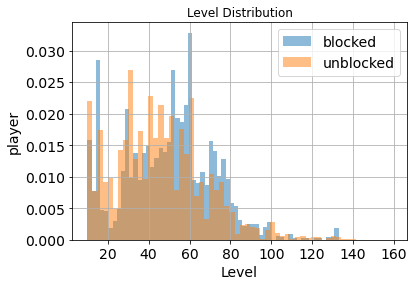

In [11]:
plt.hist(data_level_blocked, density=True, alpha=0.5, label='blocked', bins=60)
plt.hist(data_level_unblocked, density=True, alpha=0.5, label='unblocked', bins=60)
plt.grid()
plt.title('Level Distribution')
plt.xlabel('Level', fontsize=14)
plt.ylabel('player', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# 스냅샷 타임스탬프

In [12]:
data_timestamp_blocked = data_blocked['logging_timestamp']
data_timestamp_unblocked = data_unblocked['logging_timestamp']

# 전체 타임스탬프
data_datetime_blocked = pd.to_datetime(data_timestamp_blocked)
data_datetime_unblocked = pd.to_datetime(data_timestamp_unblocked)

# 년, 월, 일
data_date_blocked = pd.to_datetime(data_timestamp_blocked).dt.date
data_date_unblocked = pd.to_datetime(data_timestamp_unblocked).dt.date

# 시, 분, 초
data_time_blocked = pd.to_datetime(data_timestamp_blocked).dt.time
data_time_unblocked = pd.to_datetime(data_timestamp_unblocked).dt.time

# 시
data_hour_blocked = pd.to_datetime(data_timestamp_blocked).dt.strftime('%H').astype(int)
data_hour_blocked = data_hour_blocked.replace(0, 24)
data_hour_unblocked = pd.to_datetime(data_timestamp_unblocked).dt.strftime('%H').astype(int)
data_hour_unblocked = data_hour_unblocked.replace(0, 24)

##### 제재/비제재 스냅샷 로그 시작일, 종료일

In [13]:
print(data_datetime_blocked.min())
print(data_datetime_blocked.max())
print("---------------------------")
print(data_datetime_unblocked.min())
print(data_datetime_unblocked.max())

2017-06-09 15:00:53.481723
2017-06-29 12:05:25.746006
---------------------------
2017-06-09 14:59:22.715666
2017-06-29 14:45:03.664863


In [14]:
data_datetime_blocked

11696   2017-06-14 04:27:53.830950
11697   2017-06-14 04:58:01.554850
11698   2017-06-14 05:28:01.780274
11699   2017-06-14 05:58:06.277458
11700   2017-06-14 06:28:10.415863
                   ...            
94068   2017-06-19 01:26:21.103442
94069   2017-06-19 01:56:29.554139
94070   2017-06-19 02:26:30.234616
94071   2017-06-19 02:56:31.277885
94072   2017-06-19 03:26:33.588112
Name: logging_timestamp, Length: 62460, dtype: datetime64[ns]

#### 일자별 제재/비제재 이용일

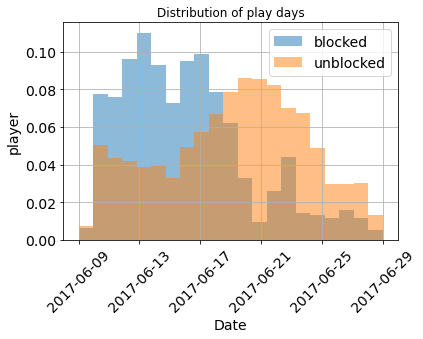

In [15]:
plt.hist(data_date_blocked, density=True, alpha=0.5, label='blocked', bins=21)
plt.hist(data_date_unblocked, density=True, alpha=0.5, label='unblocked', bins=21)
plt.grid()
plt.title('Distribution of play days')
plt.xlabel('Date', fontsize=14)
plt.ylabel('player', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

#### 시간대별 제재/비제재 이용일

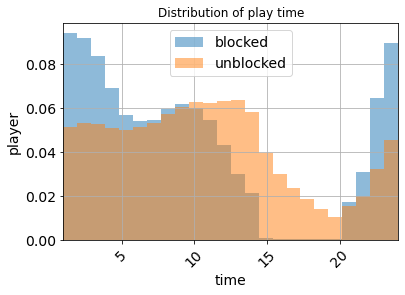

In [16]:
plt.hist(data_hour_blocked, density=True, alpha=0.5, label='blocked', bins=24)
plt.hist(data_hour_unblocked, density=True, alpha=0.5, label='unblocked', bins=24)
plt.grid()
plt.xlim([1, 24])
plt.title("Distribution of play time")
plt.xlabel('time', fontsize=14)
plt.ylabel('player', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [17]:
hist_time_blocked = np.array([0 for i in range(24+1)])

for idx, _item in enumerate(data_hour_blocked):
    hist_time_blocked[int(_item)] += 1
print(hist_time_blocked)

[   0 5633 5513 5002 4140 3408 3240 3275 3576 3711 3606 3287 2597 1808
 1295   54   34   35   35   34   27 1035 1870 3881 5364]


# 캐릭터별 레벨 변화

#### 캐릭터별 10개의 타임스탬프에서
#### 가장 마지막 스탬프와 가장 처음 스탬프에서의 레벨 차이를 구함

In [18]:
# newID
data_newID_blocked = data_blocked['newID']
data_newID_unblocked = data_unblocked['newID']

# Level
data_level_blocked = data_blocked['char_level']
data_level_unblocked = data_unblocked['char_level']

# Timestamp
data_timestamp_blocked = data_blocked['logging_timestamp']
data_timestamp_unblocked = data_unblocked['logging_timestamp']
data_datetime_blocked = pd.to_datetime(data_timestamp_blocked)
data_datetime_unblocked = pd.to_datetime(data_timestamp_unblocked)

In [19]:
list_newID_unblocked = data_newID_unblocked[:]
set_newID_unblocked = list(set(list_newID_unblocked))  # 중복 제거, 4195

list_newid_minmax_unblocked = np.array([[999, 0] for i in range(len(set_newID_unblocked))])

for _id, _level in zip(data_newID_unblocked, data_level_unblocked):
    newid_index = set_newID_unblocked.index(_id)
    list_newid_minmax_unblocked[newid_index][0] = min(list_newid_minmax_unblocked[newid_index][0], _level)
    list_newid_minmax_unblocked[newid_index][1] = max(list_newid_minmax_unblocked[newid_index][1], _level)

# for _id, _level in zip(set_newID_unblocked, list_newid_minmax_unblocked):
#     print(_id, _level[0], _level[1])  #newID, level_min, level_max

list_newID_blocked = data_newID_blocked[:]
set_newID_blocked = list(set(list_newID_blocked))  # 중복 제거, 4195

list_newid_minmax_blocked = np.array([[999, 0] for i in range(len(set_newID_blocked))])

for _id, _level in zip(data_newID_blocked, data_level_blocked):
    newid_index = set_newID_blocked.index(_id)
    list_newid_minmax_blocked[newid_index][0] = min(list_newid_minmax_blocked[newid_index][0], _level)
    list_newid_minmax_blocked[newid_index][1] = max(list_newid_minmax_blocked[newid_index][1], _level)

for _id, _level in zip(set_newID_blocked, list_newid_minmax_blocked):
    print(_id, _level[0], _level[1])  #newID, level_min, level_max

1650 17 76
1652 10 79
1653 11 66
1654 10 103
1656 10 78
1657 10 109
1658 12 69
1659 17 69
1661 13 70
1662 13 47
1663 10 51
1664 18 57
1665 16 59
1667 13 61
1668 16 65
1669 16 67
1670 18 63
1671 16 59
1673 17 41
1677 11 60
1678 10 69
1681 11 55
1682 11 60
1684 13 133
1686 13 66
1688 10 57
1689 10 60
1690 10 31
1691 16 66
1694 10 75
1696 11 60
1697 15 60
1698 16 60
1699 16 69
1700 12 60
1703 10 86
1704 13 60
1705 12 60
1706 15 67
1709 10 58
1710 10 30
1711 11 73
1712 11 68
1713 16 61
1714 12 57
1715 16 109
1716 13 133
1717 15 72
1719 12 64
1721 13 74
1723 17 67
1724 13 70
1725 14 60
1726 12 56
1727 13 124
1735 16 71
1736 10 79
1737 12 76
1738 16 60
1741 16 56
1742 10 64
1744 15 66
1745 12 47
1746 15 71
1748 13 64
1749 10 71
1751 10 73
1754 10 118
1755 10 59
1756 16 56
1758 15 70
1759 10 61
1760 10 41
1764 16 76
1765 10 76
1768 16 132
1770 16 68
1771 16 57
1772 13 78
1774 18 71
1775 16 71
1779 16 68
1780 17 60
1782 16 55
1783 14 52
1786 14 51
1788 12 49
1789 15 56
1790 16 71
1791 13 60
17

4960 14 69
4963 10 43
4964 12 75
4965 16 73
4966 12 54
4967 16 60
4968 11 59
4970 16 74
4975 17 70
4977 17 66
4980 16 51
4981 16 70
4984 11 66
4985 16 71
4987 10 59
4990 14 58
4992 16 75
4993 12 63
4994 16 72
4995 16 58
4997 18 58
4998 13 65
5000 16 60
5001 16 133
5008 10 76
5009 16 63
5010 16 56
5012 11 64
5013 18 61
5015 14 71
5017 10 60
5022 11 60
5025 18 60
5026 10 70
5027 12 67
5028 11 71
5029 10 59
5030 10 59
5036 18 71
5037 11 60
5038 16 76
5039 14 67
5048 11 58
5050 16 127
5052 13 66
5054 15 55
5055 16 63
5056 13 60
5057 12 74
5059 13 54
5060 16 61
5061 10 61
5062 10 78
5064 17 58
5065 13 60
5068 12 74
5069 16 73
5071 18 62
5073 13 60
5074 16 72
5075 10 60
5080 10 60
5081 16 70
5082 14 76
5083 14 51
5085 16 72
5088 14 61
5089 12 78
5092 13 79
5093 18 76
5098 10 30
5099 12 71
5100 16 68
5101 16 63
5104 12 60
5107 10 66
5108 12 57
5110 11 76
5111 12 69
5112 10 61
5114 12 77
5116 10 79
5117 13 66
5119 19 106
5124 17 64
5126 18 68
5127 12 78
5132 10 76
5135 13 60
5138 16 133
5140 1

8724 15 79
8735 10 60
8736 14 71
8740 15 63
8741 15 71
8745 12 55
8746 16 82
8748 15 70
8750 16 77
8751 11 42
8753 15 89
8754 16 86
8757 16 59
8761 19 103
8763 16 91
8764 18 57
8765 15 63
8767 16 49
8771 16 97
8773 16 83
8777 19 60
8781 14 60
8782 15 67
8784 11 46
8787 13 38
8788 16 86
8791 16 73
8793 13 76
8794 13 54
8795 15 75
8796 15 56
8797 11 57
8798 10 72
8799 11 65
8800 15 67
8801 15 76
8802 16 81
8803 16 89
8804 16 80
8807 16 68
8808 13 73
8815 15 71
8820 16 62
8821 18 88
8822 17 60
8824 16 68
8826 16 133
8827 15 77
8828 16 109
8830 16 83
8833 15 74
8835 10 64
8836 12 68
8837 11 80
8838 16 79
8839 13 61
8840 15 90
8843 16 86
8849 15 60
8850 13 60
8852 13 50
8853 16 73
8855 19 52
8856 16 70
8857 14 84
8858 16 77
8859 15 71
8860 17 58
8861 15 69
8864 15 74
8865 13 44
8866 15 62
8870 11 59
8871 15 58
8874 10 59
8876 13 73
8879 11 72
8880 11 37
8882 15 59
8884 16 89
8885 16 88
8886 16 92
8888 16 78
8892 16 72
8893 16 81
8894 16 90
8896 16 82
8899 12 86
8900 16 76
8902 18 65
8911 10

11988 16 80
11991 15 67
11992 13 133
11993 15 52
11994 16 75
11996 16 61
11997 16 90
11999 14 60
12003 16 99
12006 18 62
12007 19 60
12008 14 34
12013 17 61
12014 17 60
12015 14 60
12017 11 62
12018 16 73
12019 16 70
12020 16 70
12021 16 82
12023 15 75
12024 11 50
12025 15 60
12026 15 79
12027 11 64
12029 16 89
12030 16 92
12031 16 97
12033 15 71
12037 16 82
12038 16 70
12039 16 95
12043 16 74
12044 17 60
12046 19 60
12047 15 49
12056 17 37
12059 16 75
12060 16 97
12061 13 86
12064 13 74
12065 11 55
12066 16 91
12068 16 91
12069 16 85
12070 16 132
12071 16 71
12074 15 84
12076 16 84
12077 15 91
12078 16 75
12080 19 58
12081 18 59
12085 10 37
12086 17 78
12087 10 69
12089 10 58
12090 11 51
12091 11 70
12093 16 82
12095 16 97
12096 16 64
12097 10 76
12099 10 54
12100 11 35
12101 13 100
12102 16 133
12104 14 95
12105 16 82
12106 16 92
12107 15 86
12108 16 89
12109 16 75
12113 10 133
12114 15 76
12116 15 78
12120 16 80
12121 15 102
12124 20 57
12125 16 60
12126 19 65
12128 16 60
12129 15 6

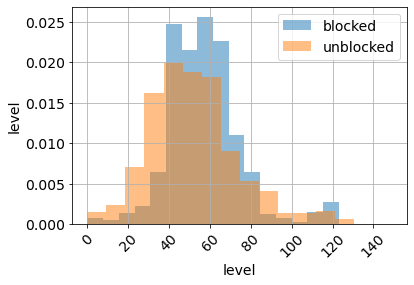

In [20]:
# 레벨 증가 값
level_gap_unblocked = []
for _level in list_newid_minmax_unblocked:
    level_gap_unblocked.append(_level[1] - _level[0])
    
level_gap_blocked = []
for _level in list_newid_minmax_blocked:
    level_gap_blocked.append(_level[1] - _level[0])

plt.hist(level_gap_blocked, density=True, alpha=0.5, label='blocked', bins=16)
plt.hist(level_gap_unblocked, density=True, alpha=0.5, label='unblocked', bins=16)
plt.grid()
plt.xlabel('level', fontsize=14)
plt.ylabel('level', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# 타임스탬프 간격

#### 마지막 타임스탬프와 처음 스탬프의 간격

In [21]:
data_newID_all = data['newID']
data_timestamp_all = data['logging_timestamp']
data_datetime_all = pd.to_datetime(data_timestamp_all)

[9363  619  216   99   60   30   23   11    6    3    0    4    3    1
    0    2    0    1]


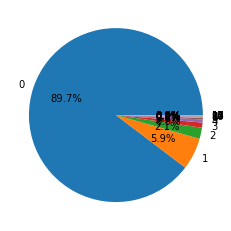

In [22]:
list_newID_all = data_newID_all[:]
set_newID_all = list(set(list_newID_all))  # 중복 제거, 10441

tmp_min_date = pd.to_datetime('2010-10-10 8:59:4.224398')
tmp_max_date = pd.to_datetime('2022-12-31 23:59:59.671623')

list_time_minmax = np.array([[tmp_max_date, tmp_min_date] for i in range(len(set_newID_all))])

for _id, _datetime in zip(data_newID_all, data_datetime_all):
    newid_index = set_newID_all.index(_id)
    list_time_minmax[newid_index][0] = min(pd.to_datetime(list_time_minmax[newid_index][0]), _datetime)
    list_time_minmax[newid_index][1] = max(pd.to_datetime(list_time_minmax[newid_index][1]), _datetime)

# 타임스탬프 간격 (가장 짧은 간격, 가장 긴 간격)
tmp_date = []
for _id, _datetime in zip(set_newID_all, list_time_minmax):
    tmp_date.append(_datetime[1] - _datetime[0])
    
list_days = np.array([0 for _ in range(18)])
for _date in tmp_date:
    list_days[_date.days] += 1
print(list_days)
    
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.pie(list_days, labels=labels, autopct='%.1f%%')
plt.show()

# 6-1. 타임간격 스탬프 - blocked

In [23]:
data_newID_blocked = data_blocked['newID']
data_timestamp_blocked = data_blocked['logging_timestamp']
data_datetime_blocked = pd.to_datetime(data_timestamp_blocked)

[6147   91    8    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
-------------------------


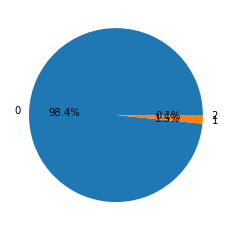

In [24]:
list_newID_blocked = data_newID_blocked[:]
set_newID_blocked = list(set(list_newID_blocked))  # 중복 제거, 10441

tmp_min_date = pd.to_datetime('2010-10-10 8:59:4.224398')
tmp_max_date = pd.to_datetime('2022-12-31 23:59:59.671623')

list_time_minmax = np.array([[tmp_max_date, tmp_min_date] for i in range(len(set_newID_blocked))])

for _id, _datetime in zip(data_newID_blocked, data_datetime_blocked):
    newid_index = set_newID_blocked.index(_id)
    list_time_minmax[newid_index][0] = min(pd.to_datetime(list_time_minmax[newid_index][0]), _datetime)
    list_time_minmax[newid_index][1] = max(pd.to_datetime(list_time_minmax[newid_index][1]), _datetime)

# 타임스탬프 간격 (가장 짧은 간격, 가장 긴 간격)
tmp_date = []
for _id, _datetime in zip(set_newID_blocked, list_time_minmax):
    tmp_date.append(_datetime[1] - _datetime[0])

list_days = np.array([0 for _ in range(18)])
for _date in tmp_date:
    list_days[_date.days] += 1
print(list_days)

print("-------------------------")
ratio = [6147, 91, 8]
labels = [0, 1, 2]
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

# 6-2. 타임간격 스탬프 - unblocked

In [25]:
data_newID_unblock = data_unblocked['newID']
data_timestamp_unblock = data_unblocked['logging_timestamp']
data_datetime_unblock = pd.to_datetime(data_timestamp_unblock)

[3216  528  208   99   60   30   23   11    6    3    0    4    3    1
    0    2    0    1]


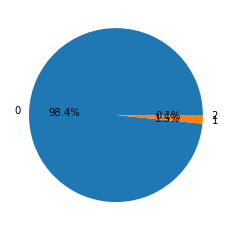

In [26]:
list_newID_unblock = data_newID_unblock[:]
set_newID_unblock = list(set(list_newID_unblock))  # 중복 제거, 10441

tmp_min_date = pd.to_datetime('2010-10-10 8:59:4.224398')
tmp_max_date = pd.to_datetime('2022-12-31 23:59:59.671623')

list_time_minmax = np.array([[tmp_max_date, tmp_min_date] for i in range(len(set_newID_unblock))])

for _id, _datetime in zip(data_newID_unblock, data_datetime_unblock):
    newid_index = set_newID_unblock.index(_id)
    list_time_minmax[newid_index][0] = min(pd.to_datetime(list_time_minmax[newid_index][0]), _datetime)
    list_time_minmax[newid_index][1] = max(pd.to_datetime(list_time_minmax[newid_index][1]), _datetime)

# 타임스탬프 간격 (가장 짧은 간격, 가장 긴 간격)
tmp_date = []
for _id, _datetime in zip(set_newID_unblock, list_time_minmax):
    tmp_date.append(_datetime[1] - _datetime[0])
    
list_days = np.array([0 for _ in range(18)])
for _date in tmp_date:
    list_days[_date.days] += 1
print(list_days)

ratio = [6147, 91, 8]
labels = [0, 1, 2]
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

# 타임스탬프 간격간 레벨업 분포

#### 스냅샷 로그에서 연속되는 타임스탬프 간격 30분 간격이 있을 경우 30분간 업한 레벨 값
#### 30분 간격을 넘는 경우는 무시하고, 다시 그 다음 로그와 30분간격 비교

In [27]:
data_newID_blocked = data_blocked['newID']
data_level_blocked = data_blocked['char_level']
data_timestamp_blocked = data_blocked['logging_timestamp']
data_datetime_blocked = pd.to_datetime(data_timestamp_blocked)

data_newID_unblocked = data_unblocked['newID']
data_level_unblocked = data_unblocked['char_level']
data_timestamp_unblocked = data_unblocked['logging_timestamp']
data_datetime_unblocked = pd.to_datetime(data_timestamp_unblocked)

## blocked

In [28]:
list_levelup_count_blocked = np.array([0 for i in range(100)])  # 레벨 누적

ref_id = -1
tmp_id = []
tmp_level= []
tmp_datetime = []

for idx, (_id, _level, _datetime) in enumerate(zip(data_newID_blocked, data_level_blocked, data_datetime_blocked)):
    if idx == 0:
        ref_id = _id
        tmp_id.append(_id)
        tmp_level.append(_level)
        tmp_datetime.append(_datetime)
        continue

    if ref_id == _id:
        tmp_id.append(_id)
        tmp_level.append(_level)
        tmp_datetime.append(_datetime)
    else:
        tmp_id.sort()
        tmp_level.sort()
        tmp_datetime.sort()
        
        ref_level = 0
        ref_datetime = 0

        for tmp_idx, (_tmpid, _tmplevel, _tmpdatetime) in enumerate(zip(tmp_id, tmp_level, tmp_datetime)):
            if tmp_idx == 0:
                ref_level = _tmplevel
                ref_datetime = _tmpdatetime
                continue
            if (_tmpdatetime - ref_datetime).total_seconds() < 1860:    # 31분
                list_levelup_count_blocked[_tmplevel - ref_level] += 1
                ref_level = _tmplevel
                ref_datetime = _tmpdatetime
            else:
                ref_level = _tmplevel
                ref_datetime = _tmpdatetime
                
        ref_id = _id
        tmp_id = []
        tmp_level= []
        tmp_datetime = []
        tmp_id.append(_id)
        tmp_level.append(_level)
        tmp_datetime.append(_datetime)

print(list_levelup_count_blocked)
ratio_levelup_count_blocked =[i for i in list_levelup_count_blocked] / sum(list_levelup_count_blocked) * 100

ratio_levelup_count_blocked = ratio_levelup_count_blocked[1:28]
ratio_levelup_count_blocked


[4388 1885 4757 6402 5729 5374 4626 2754 1932 2041 1712 1437 1640 1007
  704 1030  357  718  839  285  243  490  269   41  191    3    0  116
    0    0   93    0    0   61    0    0   60    0    0   15    0    0
    1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


array([3.68164063e+00, 9.29101562e+00, 1.25039062e+01, 1.11894531e+01,
       1.04960938e+01, 9.03515625e+00, 5.37890625e+00, 3.77343750e+00,
       3.98632812e+00, 3.34375000e+00, 2.80664062e+00, 3.20312500e+00,
       1.96679688e+00, 1.37500000e+00, 2.01171875e+00, 6.97265625e-01,
       1.40234375e+00, 1.63867188e+00, 5.56640625e-01, 4.74609375e-01,
       9.57031250e-01, 5.25390625e-01, 8.00781250e-02, 3.73046875e-01,
       5.85937500e-03, 0.00000000e+00, 2.26562500e-01])

## unblocked

In [29]:
list_levelup_count_unblocked = np.array([0 for i in range(100)])  # 레벨 누적

ref_id = -1
tmp_id = []
tmp_level= []
tmp_datetime = []

for idx, (_id, _level, _datetime) in enumerate(zip(data_newID_unblocked, data_level_unblocked, data_datetime_unblocked)):
    if idx == 0:
        ref_id = _id
        tmp_id.append(_id)
        tmp_level.append(_level)
        tmp_datetime.append(_datetime)
        continue

    if ref_id == _id:
        tmp_id.append(_id)
        tmp_level.append(_level)
        tmp_datetime.append(_datetime)
    else:
        tmp_id.sort()
        tmp_level.sort()
        tmp_datetime.sort()
        
        ref_level = 0
        ref_datetime = 0

        for tmp_idx, (_tmpid, _tmplevel, _tmpdatetime) in enumerate(zip(tmp_id, tmp_level, tmp_datetime)):
            if tmp_idx == 0:
                ref_level = _tmplevel
                ref_datetime = _tmpdatetime
                continue
            if (_tmpdatetime - ref_datetime).total_seconds() < 1860:    # 31분
                list_levelup_count_unblocked[_tmplevel - ref_level] += 1
                ref_level = _tmplevel
                ref_datetime = _tmpdatetime
            else:
                ref_level = _tmplevel
                ref_datetime = _tmpdatetime
                
        ref_id = _id
        tmp_id = []
        tmp_level= []
        tmp_datetime = []
        tmp_id.append(_id)
        tmp_level.append(_level)
        tmp_datetime.append(_datetime)

print(list_levelup_count_unblocked)
ratio_levelup_count_unblocked =[i for i in list_levelup_count_unblocked] / sum(list_levelup_count_unblocked) * 100

ratio_levelup_count_unblocked = ratio_levelup_count_unblocked[1:28]
ratio_levelup_count_unblocked



[5175 1370 2356 4792 2444 2062 4004 1181  799 2450  646  497 1493  368
  337  813  152  161  524   77   96  330   65   17  120    7    3   87
    3    0   50    2    1   28    0    0   34    0    0   10    1    0
    2    0    0    2    0    0    0    0    1    1    0    0    0    0
    0    0    0    0    0    1    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    0    0    1    0    0    1
    0    0    0    1    0    0    3    0    0    0    0    0    0    0
    0    0]


array([4.20645399e+00, 7.23387270e+00, 1.47133778e+01, 7.50406829e+00,
       6.33117382e+00, 1.22938991e+01, 3.62614756e+00, 2.45325309e+00,
       7.52249071e+00, 1.98348122e+00, 1.52599097e+00, 4.58411373e+00,
       1.12990881e+00, 1.03472627e+00, 2.49623875e+00, 4.66701465e-01,
       4.94335104e-01, 1.60889189e+00, 2.36421137e-01, 2.94758820e-01,
       1.01323344e+00, 1.99576284e-01, 5.21968743e-02, 3.68448525e-01,
       2.14928306e-02, 9.21121312e-03, 2.67125180e-01])

## histogram

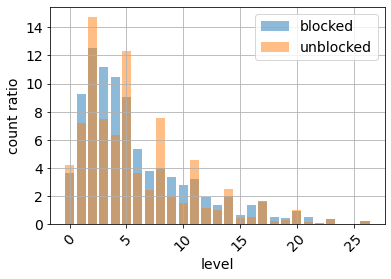

In [30]:
x = np.arange(len(ratio_levelup_count_unblocked))
plt.bar(x, ratio_levelup_count_blocked, alpha=0.5, label='blocked')

plt.bar(x, ratio_levelup_count_unblocked, alpha=0.5, label='unblocked')

plt.grid()
plt.xlabel('level', fontsize=14)
plt.ylabel('count ratio', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# readme.txt에 설명이 없는 컬럼 확인

5 11
-2 11


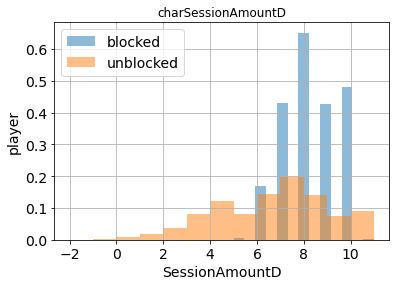

In [31]:
data_charSessionAmountD_b = data_blocked['charSessionAmountD']
data_charSessionAmountD_u = data_unblocked['charSessionAmountD']

print(data_charSessionAmountD_b.min(), data_charSessionAmountD_b.max())
print(data_charSessionAmountD_u.min(), data_charSessionAmountD_u.max())
bins = max(data_charSessionAmountD_b.max(), data_charSessionAmountD_u.max()) - min(data_charSessionAmountD_b.min(), data_charSessionAmountD_u.min())

plt.hist(data_charSessionAmountD_b, density=True, alpha=0.5, label='blocked', bins=bins)
plt.hist(data_charSessionAmountD_u, density=True, alpha=0.5, label='unblocked', bins=bins)
plt.grid()
plt.title('charSessionAmountD')
plt.xlabel('SessionAmountD', fontsize=14)
plt.ylabel('player', fontsize=14)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

[30273   449 11362  3367  5731  1525  3873   522  2332   274   931  1169
   287    39    73    19    38     7    33    11    19     4    15     4
     8     3     8     4    13     3     6     3     6     0     8     3
     7     2     2     0     2     1     1     1     2     3     1     1
     1     1     2     0     1     1     0     0     1     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     2     0     0     1     0     0     0     1     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     1     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     1     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     1     0
     0     0     0     0     0     0     0     0   

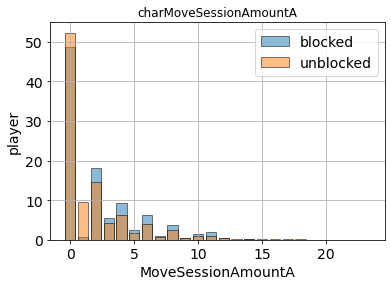

In [32]:
data_charMoveSessionAmountA_b = data_blocked['charMoveSessionAmountA']
data_charMoveSessionAmountA_u = data_unblocked['charMoveSessionAmountA']

set_MoveSessionAmountA_b = list(set(data_charMoveSessionAmountA_b))  # 중복 제거
set_MoveSessionAmountA_u = list(set(data_charMoveSessionAmountA_u))  # 중복 제거

set_range = max(max(set_MoveSessionAmountA_b), max(set_MoveSessionAmountA_u))

list_MoveSessionAmountA_b = np.array([0 for i in range(set_range+1)])      # 리스트 생성 & 초기화
list_MoveSessionAmountA_u = np.array([0 for i in range(set_range+1)])  # 리스트 생성 & 초기화

for idx, _item in enumerate(data_charMoveSessionAmountA_b):
    list_MoveSessionAmountA_b[_item] += 1
    
for idx, _item in enumerate(data_charMoveSessionAmountA_u):
    list_MoveSessionAmountA_u[_item] += 1

print(list_MoveSessionAmountA_b)
print(list_MoveSessionAmountA_u)

list_MoveSessionAmountA_b = list_MoveSessionAmountA_b[:24]
list_MoveSessionAmountA_u = list_MoveSessionAmountA_u[:24]
print(list_MoveSessionAmountA_b)
print(list_MoveSessionAmountA_u)

ratio_MoveSessionAmountA_b =[i for i in list_MoveSessionAmountA_b] / sum(list_MoveSessionAmountA_b) * 100
ratio_MoveSessionAmountA_u =[i for i in list_MoveSessionAmountA_u] / sum(list_MoveSessionAmountA_u) * 100
print(ratio_MoveSessionAmountA_b)
print(ratio_MoveSessionAmountA_u)

x = np.arange(len(ratio_MoveSessionAmountA_b))

plt.bar(x, ratio_MoveSessionAmountA_b, alpha=0.5, label='blocked', edgecolor='black')
plt.bar(x, ratio_MoveSessionAmountA_u, alpha=0.5, label='unblocked', edgecolor='black')
plt.grid()
plt.title('charMoveSessionAmountA')
plt.xlabel('MoveSessionAmountA', fontsize=14)
plt.ylabel('player', fontsize=14)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()


# 기타 등등

0 8512 851.2


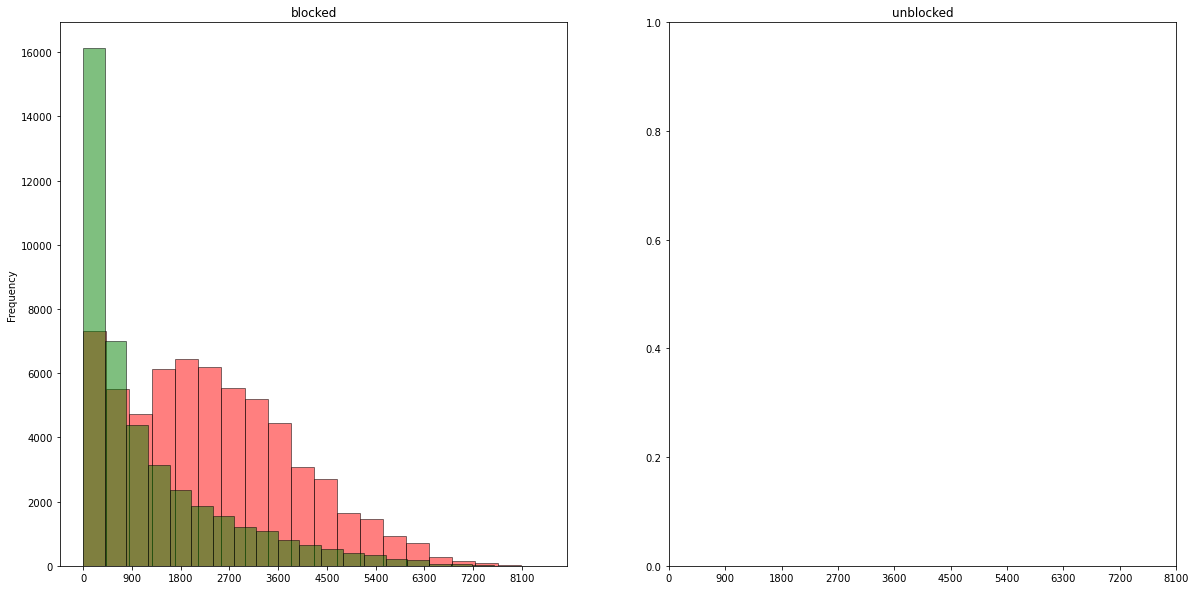

In [33]:
# actionSessionAmountA
x1_min = min(min(data[data['blocked']==1].actionSessionAmountA), min(data[data['blocked']==0].actionSessionAmountA))
x1_max = max(max(data[data['blocked']==1].actionSessionAmountA), max(data[data['blocked']==0].actionSessionAmountA))
x1_step = (abs(x1_min) + x1_max) / 10
print(x1_min, x1_max, x1_step)
#x1=list(range(x1_min, x1_max, int(x1_step)))

f, ax=plt.subplots(1, 2,figsize=(20, 10))
data[data['blocked']==1].actionSessionAmountA.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red', alpha=0.5)
ax[0].set_title('blocked')
x1=list(range(0,9000,900))
ax[0].set_xticks(x1)
data[data['blocked']==0].actionSessionAmountA.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='green', alpha=0.5)
ax[1].set_title('unblocked')

x1=list(range(0,9000,900))
ax[1].set_xticks(x1)
plt.show()

0 5745 574.5


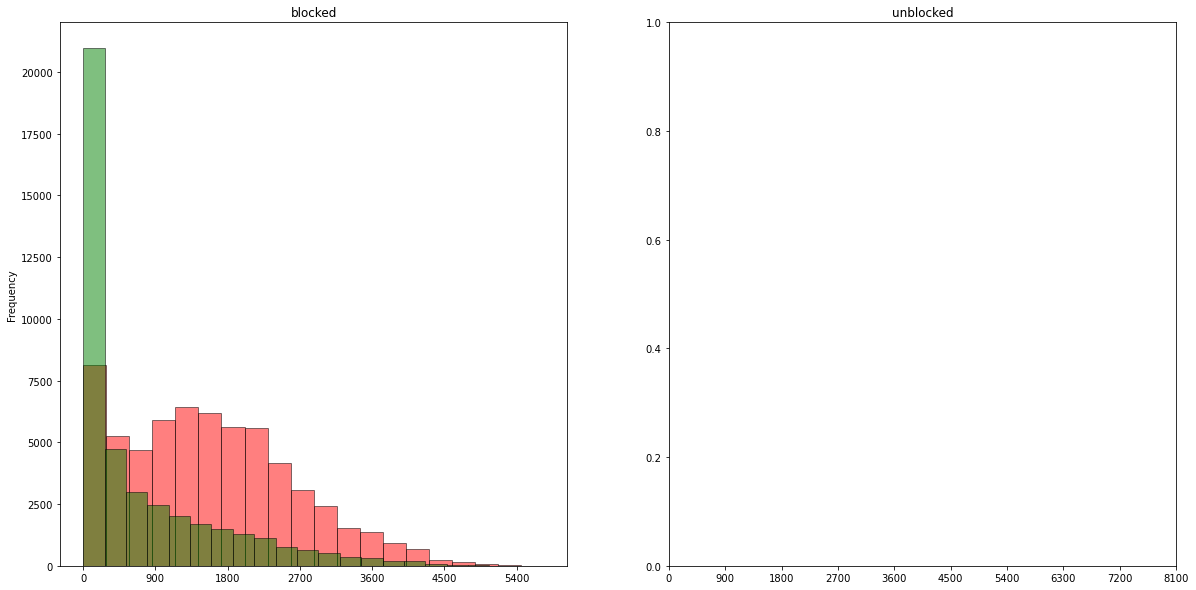

In [34]:
# actionSessionAmountL
x1_min = min(min(data[data['blocked']==1].actionSessionAmountN), min(data[data['blocked']==0].actionSessionAmountN))
x1_max = max(max(data[data['blocked']==1].actionSessionAmountN), max(data[data['blocked']==0].actionSessionAmountN))
x1_step = (abs(x1_min) + x1_max) / 10
print(x1_min, x1_max, x1_step)
#x1=list(range(x1_min, x1_max, int(x1_step)))

f, ax=plt.subplots(1, 2,figsize=(20, 10))
data[data['blocked']==1].actionSessionAmountN.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red', alpha=0.5)
ax[0].set_title('blocked')
x1=list(range(0,9000,900))
ax[0].set_xticks(x1)
data[data['blocked']==0].actionSessionAmountN.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='green', alpha=0.5)
ax[1].set_title('unblocked')

x1=list(range(0,9000,900))
ax[1].set_xticks(x1)
plt.show()